In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
x,y = make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
x

array([[-11.27773126,   4.15341596],
       [ -6.38167497,  -1.89470866],
       [ -8.90517453,   3.85246771],
       ...,
       [ -9.10663218,   3.84322777],
       [ -8.88730806,   2.68877524],
       [ -8.2906196 ,   4.37765647]])

In [4]:
y

array([1, 2, 1, 1, 2, 1, 0, 0, 2, 2, 2, 0, 0, 2, 1, 2, 0, 0, 1, 2, 2, 0,
       2, 1, 0, 1, 0, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 0, 1,
       1, 2, 2, 1, 1, 1, 0, 2, 1, 0, 0, 2, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0,
       1, 1, 0, 0, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 0, 1, 1, 1, 1, 0,
       0, 2, 0, 1, 0, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 0, 0, 0, 0,
       1, 2, 0, 2, 2, 2, 1, 2, 2, 1, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 2, 2,
       1, 2, 2, 1, 1, 1, 0, 2, 2, 0, 1, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0,
       2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 1, 1, 0, 1, 0,
       2, 1, 0, 2, 0, 0, 1, 2, 1, 2, 0, 2, 2, 1, 0, 1, 2, 0, 0, 0, 2, 2,
       0, 2, 1, 2, 1, 0, 0, 2, 2, 1, 2, 2, 0, 1, 0, 1, 0, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2,
       1, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2,
       0, 2, 1, 0, 1, 1, 2, 2, 1, 0, 2, 0, 0, 2, 2, 1, 0, 2, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 1, 0, 1, 0, 2, 1, 1, 1, 1,

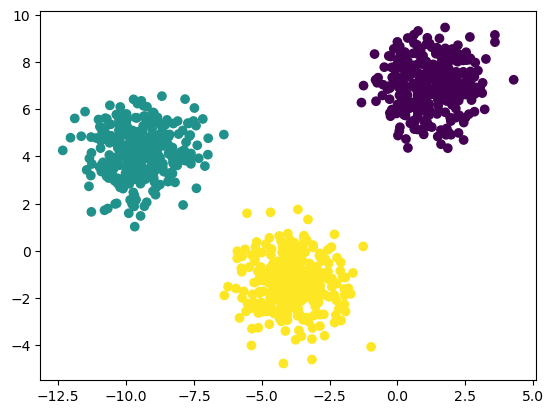

In [6]:
plt.scatter(x[:,0],x[:,1],c=y)

In [7]:
#standardization -- feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [8]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size = 0.33, random_state = 42)

In [13]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [19]:
from sklearn.cluster import KMeans

In [20]:
## Elbow Method to select K value
wcss = []
for k in range (1,11):
    kmeans = KMeans(n_clusters = k, init = "k-means++")
    kmeans.fit(x_train_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [21]:
wcss

[1340.0000000000005,
 500.88893500902014,
 85.53899202493182,
 73.62456269681442,
 61.753318406038815,
 50.38916914235687,
 44.97795206359015,
 40.73460445955397,
 36.36193987307712,
 33.52589027601149]

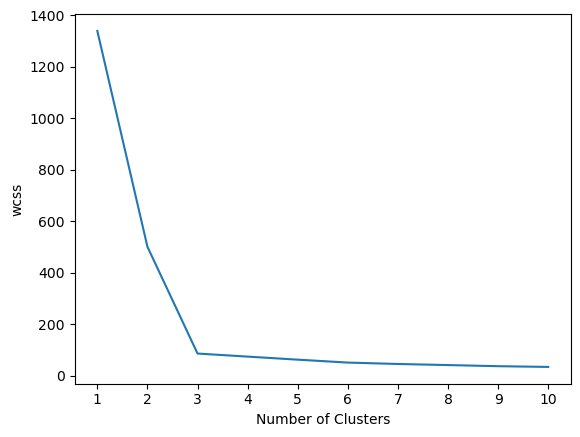

In [22]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.show()

In [23]:
kmeans = KMeans(n_clusters=3, init = "k-means++")

In [24]:
kmeans.fit_predict(x_train_scaled)

C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([1, 0, 0, 2, 2, 1, 2, 2, 2, 1, 0, 2, 2, 1, 0, 1, 2, 0, 0, 0, 0, 1,
       2, 0, 1, 1, 2, 1, 1, 0, 2, 2, 2, 0, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0,
       0, 2, 0, 2, 2, 2, 1, 0, 1, 2, 2, 0, 2, 2, 0, 1, 1, 2, 2, 0, 0, 2,
       2, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0, 0,
       2, 1, 2, 1, 1, 0, 0, 0, 2, 0, 1, 2, 2, 2, 2, 2, 1, 0, 2, 1, 1, 1,
       0, 1, 0, 0, 2, 0, 2, 1, 0, 1, 2, 2, 0, 1, 1, 0, 1, 0, 1, 1, 2, 1,
       2, 0, 2, 1, 1, 2, 0, 2, 2, 0, 0, 1, 2, 1, 0, 0, 0, 2, 1, 1, 0, 2,
       1, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       2, 1, 2, 0, 2, 2, 1, 1, 0, 2, 1, 0, 1, 1, 2, 0, 1, 1, 2, 0, 0, 2,
       2, 0, 0, 2, 2, 0, 0, 2, 1, 0, 0, 2, 1, 2, 1, 1, 0, 2, 1, 1, 1, 2,
       2, 0, 0, 0, 2, 0, 2, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 2, 2, 2,
       2, 1, 1, 2, 2, 1, 0, 1, 2, 0, 2, 0, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 1, 2, 2, 2, 2, 0, 0, 2, 1, 1, 2, 0,

In [25]:
y_predict=kmeans.predict(x_test_scaled)

In [26]:
y_predict

array([0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 0, 2, 0, 2,
       1, 0, 0, 0, 2, 2, 1, 1, 1, 1, 2, 2, 2, 0, 2, 1, 1, 1, 1, 1, 0, 0,
       2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2,
       2, 1, 1, 2, 0, 1, 2, 0, 2, 1, 1, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 0,
       0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 1, 0, 0, 2, 1, 1, 0, 2, 1, 2, 0, 0,
       1, 1, 1, 1, 2, 0, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1,
       2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 0, 2, 2, 2, 1, 0, 1, 2, 2, 0, 1, 2,
       1, 1, 1, 0, 1, 2, 1, 1, 2, 2, 0, 2, 0, 2, 1, 1, 1, 1, 2, 2, 0, 1,
       1, 2, 0, 0, 2, 2, 1, 0, 1, 1, 2, 2, 0, 0, 2, 2, 2, 2, 1, 0, 1, 0,
       1, 1, 2, 2, 2, 2, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 2, 2, 1, 0, 2, 0,
       2, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 1, 2, 0, 0, 1, 2,
       2, 1, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 2,
       0, 2, 2, 1, 0, 0, 0, 2, 1, 2, 1, 0, 0, 2, 0,

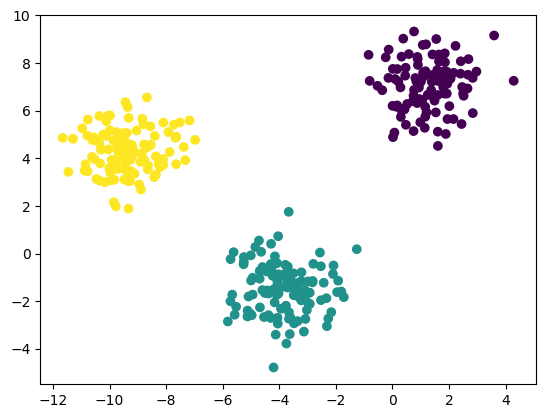

In [28]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_predict)

In [29]:
## validating the k value
## kneelocator
## silhoutee scoring

In [30]:
## kneelocator
!pip install kneed

In [31]:
from kneed import KneeLocator

In [32]:
kl = KneeLocator(range(1,11), wcss, curve= "convex",direction = "decreasing")

In [33]:
kl.elbow

3

In [34]:
## silhoutee scoring
from sklearn.metrics import silhouette_score

In [35]:
silhouette_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k, init = "k-means++")
    kmeans.fit(x_train_scaled)
    score=silhouette_score(x_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [36]:
silhouette_coefficients

[0.6289946508204495,
 0.7858224137682616,
 0.6432800755120069,
 0.4916676316940764,
 0.3600957967894433,
 0.36228941088863137,
 0.35558888061151334,
 0.3501274538907114,
 0.3514065713766441]

ValueError: x and y must have same first dimension, but have shapes (10,) and (9,)

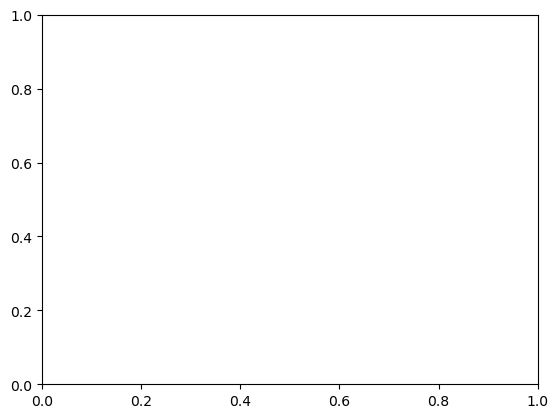

In [38]:
plt.plot(range(1,11),silhouette_coefficients)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette_coefficients")
plt.show()